Credits : https://github.com/bansalkanav/Machine_Learning_and_Deep_Learning

# Web Scrapping

1. `requests` - This is used to extract the HTML code from the given URL
2. `BeautifulSoup` - Format and Scrap the data from the HTML

**Steps**

1. Identify URL
2. Inspect HTML code
3. Find the HTML tag for the element that you want to extract.
4. Write some code to scrap this data

In [2]:
# Installing BeautifulSoup

! pip install bs4

Using legacy 'setup.py install' for bs4, since package 'wheel' is not installed.
    Running setup.py install for bs4: started
    Running setup.py install for bs4: finished with status 'done'


In [1]:
# Loading required libraries

import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

In [2]:
# Identify the URL

URL = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [3]:
# Loading the WebPage in Memory using requests library

page = requests.get(URL)

In [4]:
# Check the Status Code of the Page

page.status_code

200

In [5]:
# Extracting the HTML Code of the WebPage

htmlCode = page.text

In [6]:
htmlCode

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.5a191e.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png"/><link rel="apple-

URL = '?'

Price -> div class='?'

Rating -> div class='?'

Title -> div class='?'

Feature -> ul class='?'

URL - `https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off`

Price - div - `_30jeq3 _1_WHN1`  
Features - ul - `_1xgFaf`  
Rating - div - `_3LWZlK`  
Prod Title - div - `_4rR01T`

In [7]:
# Format the HTML code using bs4 library

soup = BeautifulSoup(htmlCode)

In [8]:
help(soup)

Help on BeautifulSoup in module bs4 object:

class BeautifulSoup(bs4.element.Tag)
 |  BeautifulSoup(markup='', features=None, builder=None, parse_only=None, from_encoding=None, exclude_encodings=None, element_classes=None, **kwargs)
 |  
 |  A data structure representing a parsed HTML or XML document.
 |  
 |  Most of the methods you'll call on a BeautifulSoup object are inherited from
 |  PageElement or Tag.
 |  
 |  Internally, this class defines the basic interface called by the
 |  tree builders when converting an HTML/XML document into a data
 |  structure. The interface abstracts away the differences between
 |  parsers. To write a new tree builder, you'll need to understand
 |  these methods as a whole.
 |  
 |  These methods will be called by the BeautifulSoup constructor:
 |    * reset()
 |    * feed(markup)
 |  
 |  The tree builder may call these methods from its feed() implementation:
 |    * handle_starttag(name, attrs) # See note about return value
 |    * handle_endtag(n

In [9]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.5a191e.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/apple-touch-icon-72x72.png" rel="apple-tou

URL = `https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off`

Price -> div class = `_30jeq3 _1_WHN1`

Rating -> div class = `_3LWZlK`

Title -> div class = `_4rR01T`

Feature List -> ul class = `_1xgFaf`

### find()

In [10]:
# Price

price = soup.find('div', attrs={'class' : '_30jeq3 _1_WHN1'})

print(price.text)

₹62,990


In [11]:
# Brand

title = soup.find('div', attrs={'class' : '_4rR01T'})

print(title.text)

HP Pavilion Core i5 11th Gen - (16 GB/512 GB SSD/Windows 10 Home) 14-dv0054TU Thin and Light Laptop


In [12]:
# Rating

rating = soup.find('div', attrs={'class' : '_3LWZlK'})

print(rating.text)

4.7


In [13]:
# Feature List

feature_list = soup.find('ul', attrs = {'class' : '_1xgFaf'})

print(feature_list.text)

Intel Core i5 Processor (11th Gen)16 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD35.56 cm (14 inch) DisplayMicrosoft Office Home and Student 2019, HP Documentation, HP Smart, HP BIOS Recovery, HP Support Assistant, Dropbox1 Year Onsite Warranty


### find_all()

In [14]:
# Find All Prices

soup.find_all('div', attrs={'class' : '_30jeq3 _1_WHN1'})

[<div class="_30jeq3 _1_WHN1">₹62,990</div>,
 <div class="_30jeq3 _1_WHN1">₹1,18,991</div>,
 <div class="_30jeq3 _1_WHN1">₹54,990</div>,
 <div class="_30jeq3 _1_WHN1">₹36,490</div>,
 <div class="_30jeq3 _1_WHN1">₹36,990</div>,
 <div class="_30jeq3 _1_WHN1">₹38,323</div>,
 <div class="_30jeq3 _1_WHN1">₹23,990</div>,
 <div class="_30jeq3 _1_WHN1">₹42,990</div>,
 <div class="_30jeq3 _1_WHN1">₹79,990</div>,
 <div class="_30jeq3 _1_WHN1">₹54,990</div>,
 <div class="_30jeq3 _1_WHN1">₹66,990</div>,
 <div class="_30jeq3 _1_WHN1">₹59,990</div>,
 <div class="_30jeq3 _1_WHN1">₹51,990</div>,
 <div class="_30jeq3 _1_WHN1">₹46,990</div>,
 <div class="_30jeq3 _1_WHN1">₹29,990</div>,
 <div class="_30jeq3 _1_WHN1">₹54,890</div>,
 <div class="_30jeq3 _1_WHN1">₹67,990</div>,
 <div class="_30jeq3 _1_WHN1">₹71,990</div>,
 <div class="_30jeq3 _1_WHN1">₹51,990</div>,
 <div class="_30jeq3 _1_WHN1">₹42,990</div>,
 <div class="_30jeq3 _1_WHN1">₹42,990</div>,
 <div class="_30jeq3 _1_WHN1">₹33,490</div>,
 <div cl

In [15]:
# Find All Ratings

soup.find_all('div', attrs={'class' : '_3LWZlK'})

[<div class="_3LWZlK">4.7</div>,
 <div class="_3LWZlK">5</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4</div>,
 <div class="_3LWZlK">4.2</div>,
 <div class="_3LWZlK">3.7</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.1</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.6</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.1</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4</div>,
 <div class="_3LWZlK">4.2</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK _1BLPMq">5</div>,
 <div class="_3LWZlK _1BLPMq">4</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK _1BLPMq">5</div>,
 <div class="_3LWZlK _1BLPMq">4

In [21]:
price = soup.find('div', attrs = {'class' : '_30jeq3 _1_WHN1'})

print(price)

print(type(price))

print(price.text)

<div class="_30jeq3 _1_WHN1">₹62,990</div>
<class 'bs4.element.Tag'>
₹62,990


In [24]:
prices = soup.find_all('div', attrs = {'class' : '_30jeq3 _1_WHN1'})

print(prices)

print(type(prices))

for tag in prices:
    print(tag.text)

[<div class="_30jeq3 _1_WHN1">₹62,990</div>, <div class="_30jeq3 _1_WHN1">₹1,18,991</div>, <div class="_30jeq3 _1_WHN1">₹54,990</div>, <div class="_30jeq3 _1_WHN1">₹36,490</div>, <div class="_30jeq3 _1_WHN1">₹36,990</div>, <div class="_30jeq3 _1_WHN1">₹38,323</div>, <div class="_30jeq3 _1_WHN1">₹23,990</div>, <div class="_30jeq3 _1_WHN1">₹42,990</div>, <div class="_30jeq3 _1_WHN1">₹79,990</div>, <div class="_30jeq3 _1_WHN1">₹54,990</div>, <div class="_30jeq3 _1_WHN1">₹66,990</div>, <div class="_30jeq3 _1_WHN1">₹59,990</div>, <div class="_30jeq3 _1_WHN1">₹51,990</div>, <div class="_30jeq3 _1_WHN1">₹46,990</div>, <div class="_30jeq3 _1_WHN1">₹29,990</div>, <div class="_30jeq3 _1_WHN1">₹54,890</div>, <div class="_30jeq3 _1_WHN1">₹67,990</div>, <div class="_30jeq3 _1_WHN1">₹71,990</div>, <div class="_30jeq3 _1_WHN1">₹51,990</div>, <div class="_30jeq3 _1_WHN1">₹42,990</div>, <div class="_30jeq3 _1_WHN1">₹42,990</div>, <div class="_30jeq3 _1_WHN1">₹33,490</div>, <div class="_30jeq3 _1_WHN1">

In [27]:
ratings = soup.find_all('div', attrs={'class' : '_3LWZlK'})

# print(ratings)

for tag in ratings:
    print(tag.text)

4.7
5
4.5
4
4.2
3.7
4.3
4.1
4.4
4.5
4.5
4.6
4.3
4.3
4.1
4.4
4.5
4.5
4.3
4.4
4
4.2
4.5
4.3
4.3
5
4
4.4
5
4
4.5
4
5
4.5
4
1
4.1
5
2


In [30]:
ratings = soup.find('div', attrs={'class' : '_3LWZlK'})

print(ratings.text)

4.7


### Let's look into all the URLs

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=8

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=10

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=9

In [32]:
# Code

# URL = https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=9


for i in range(1, 33):
    print('https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'. format(i))

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=7
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=8
https://www.flipkart.com/search?

### Code for Web Scrapping (Incorrect way)

Price -> div class = `_30jeq3 _1_WHN1`

Rating -> div class = `_3LWZlK`

Title -> div class = `_4rR01T`

Feature List -> ul class = `_1xgFaf`

In [33]:
title = []
rating = []
price = []
feature = []

for i in range(1, 33):
    URL = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'. format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    # title
    titles = soup.find_all('div', attrs={'class' : '_4rR01T'})
    for item in titles:
        title.append(item.text)
        
    # ratings
    ratings = soup.find_all('div', attrs={'class' : '_3LWZlK'})
    for item in ratings:
        rating.append(item.text)
        
    # prices
    prices = soup.find_all('div', attrs={'class' : '_30jeq3 _1_WHN1'})
    for item in prices:
        price.append(item.text)
        
    # features
    features = soup.find_all('ul', attrs={'class' : '_1xgFaf'})
    for item in features:
        feature.append(item.text)

In [36]:
print(len(title))
print(len(rating))
print(len(price))
print(len(feature))

763
1055
763
763


### Code for Web Scrapping (Correct way)

In [39]:
# Scrapping the Web Page

title = []
rating = []
price = []
features = []

for i in range(1, 33):
    URL = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'. format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    for x in soup.find_all('div', attrs={'class' : '_2kHMtA'}):

        product = x.find('div', attrs={'class' : '_4rR01T'})
        if product is None:
            title.append(np.NaN)
        else:
            title.append(product.text)

        mrp = x.find('div', attrs={'class' : '_30jeq3 _1_WHN1'})
        if mrp is None:
            price.append(np.NaN)
        else:
            price.append(mrp.text)

        rate = x.find('div', attrs={'class' : '_3LWZlK'})
        if rate is None:
            rating.append(np.NaN)
        else:
            rating.append(rate.text)

        f = x.find('ul', attrs={'class' : '_1xgFaf'})
        if f is None:
            features.append(np.NaN)
        else:
            features.append(f.text)

In [40]:
print(len(title))
print(len(price))
print(len(rating))
print(len(features))

764
764
764
764


# Create a DataFrame and save it in CSV file

In [41]:
df = pd.DataFrame({'Product' : title, 'Rating' : rating, 'MRP' : price, 'Feature' : features})

In [42]:
df.head()

,Product,Rating,MRP,Feature
0,Vaio E Series Ryzen 5 Quad Core 3500U - (8 GB/...,4.3,"₹46,990",AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...
1,Nokia PureBook X14 Core i5 10th Gen - (8 GB/51...,4.7,"₹54,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
2,DELL Inspiron 3501 Core i5 11th Gen - (8 GB/1 ...,4.4,"₹54,890",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...
3,acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/...,4.5,"₹54,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,Lenovo Ideapad S145 Core i3 10th Gen - (8 GB/2...,4,"₹36,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...


In [43]:
df.shape

(764, 4)

In [44]:
df.tail()

,Product,Rating,MRP,Feature
759,HP Pavilion Core i3 7th Gen - (8 GB/1 TB HDD/W...,4.2,"₹50,922",Intel Core i3 Processor (7th Gen)8 GB DDR4 RAM...
760,ASUS Vivobook 14 Core i3 10th Gen - (4 GB/1 TB...,NaN,"₹35,990",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...
761,msi GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,4.5,"₹64,990",Intel Core i7 Processor (9th Gen)8 GB DDR4 RAM...
762,Lenovo Ideapad S340 Core i5 10th Gen - (8 GB/5...,NaN,"₹58,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
763,Lenovo Ideapad Slim 5i Core i5 11th Gen - (8 G...,NaN,"₹58,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  764 non-null    object
 1   Rating   591 non-null    object
 2   MRP      764 non-null    object
 3   Feature  764 non-null    object
dtypes: object(4)
memory usage: 24.0+ KB


In [46]:
df.to_csv('Laptop_Details.csv', index = False)

In [47]:
df.to_csv('temp.csv')

# Extracting the Details using Regex

In [46]:
import re

In [45]:
print(df['Feature'][0])
print(df['Feature'][2])
print(df['Feature'][6])

AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayAcer Collection, Acer Product Registration, Acer Care Center, Quick Access1 Year International Travelers Warranty (ITW)
Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System256 GB SSD35.56 cm (14 inch) DisplayHP Documentation, HP CoolSense, HP SSRM, HP Smart, HP Support Assistant, Microsoft Office Home and Student 20191 Year Onsite Warranty
AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System1 TB HDD39.62 cm (15.6 inch) DisplayMicrosoft Office Home and Student 2019, HP Documentation, HP CoolSense, HP SSRM, HP Smart, HP Support Assistant1 Year Onsite Warranty


In [47]:
# Processor Information

regex = r'^[AMD|Intel][\s\w]+Processor'

df['Processor'] = df['Feature'].apply(lambda x : re.compile(regex).findall(x))

In [48]:
df.head()

,Product,Rating,MRP,Feature,Processor
0,Acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,4.5,"₹49,990",AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Quad Core Processor]
1,Asus VivoBook 15 Core i3 10th Gen - (4 GB/1 TB...,4.4,"₹34,990",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,[Intel Core i3 Processor]
2,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,4.2,"₹35,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
3,Asus VivoBook 14 Ryzen 5 Hexa Core 4500U - (8 ...,4.5,"₹47,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor]
4,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,4,"₹20,990",Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,[Intel Pentium Gold Processor]


In [50]:
# RAM Information

regex = r'[\d]+[\s]+GB[\s\w]+RAM'

df['RAM'] = df['Feature'].apply(lambda x : re.compile(regex).findall(x))

In [51]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM
0,Acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,4.5,"₹49,990",AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Quad Core Processor],[8 GB DDR4 RAM]
1,Asus VivoBook 15 Core i3 10th Gen - (4 GB/1 TB...,4.4,"₹34,990",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,[Intel Core i3 Processor],[4 GB DDR4 RAM]
2,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,4.2,"₹35,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
3,Asus VivoBook 14 Ryzen 5 Hexa Core 4500U - (8 ...,4.5,"₹47,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM]
4,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,4,"₹20,990",Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,[Intel Pentium Gold Processor],[4 GB DDR4 RAM]


In [52]:
# OS 

regex = r'[\d]+[\s]bit[\s\w]+Operating System'

df['OS'] = df['Feature'].apply(lambda x : re.compile(regex).findall(x))

In [53]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS
0,Acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,4.5,"₹49,990",AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Quad Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System]
1,Asus VivoBook 15 Core i3 10th Gen - (4 GB/1 TB...,4.4,"₹34,990",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,[Intel Core i3 Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System]
2,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,4.2,"₹35,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System]
3,Asus VivoBook 14 Ryzen 5 Hexa Core 4500U - (8 ...,4.5,"₹47,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System]
4,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,4,"₹20,990",Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,[Intel Pentium Gold Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System]


In [54]:
# Storage

regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'

df['Storage'] = df['Feature'].apply(lambda x : re.compile(regex).findall(x))

In [55]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage
0,Acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,4.5,"₹49,990",AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Quad Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD]
1,Asus VivoBook 15 Core i3 10th Gen - (4 GB/1 TB...,4.4,"₹34,990",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,[Intel Core i3 Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System],"[1 TB HDD, 256 GB SSD]"
2,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,4.2,"₹35,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[256 GB SSD]
3,Asus VivoBook 14 Ryzen 5 Hexa Core 4500U - (8 ...,4.5,"₹47,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD]
4,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,4,"₹20,990",Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,[Intel Pentium Gold Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System],[1 TB HDD]


In [56]:
# Brand

regex = r'^\w+'

df['Brand'] = df['Product'].apply(lambda x : re.compile(regex).findall(x))

In [57]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,4.5,"₹49,990",AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Quad Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[Acer]
1,Asus VivoBook 15 Core i3 10th Gen - (4 GB/1 TB...,4.4,"₹34,990",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,[Intel Core i3 Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System],"[1 TB HDD, 256 GB SSD]",[Asus]
2,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,4.2,"₹35,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[256 GB SSD],[HP]
3,Asus VivoBook 14 Ryzen 5 Hexa Core 4500U - (8 ...,4.5,"₹47,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[Asus]
4,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,4,"₹20,990",Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,[Intel Pentium Gold Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System],[1 TB HDD],[Acer]


# Cleaning the Data

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    607 non-null    object
 1   Rating     415 non-null    object
 2   MRP        607 non-null    object
 3   Feature    607 non-null    object
 4   Processor  607 non-null    object
 5   RAM        607 non-null    object
 6   OS         607 non-null    object
 7   Storage    607 non-null    object
 8   Brand      607 non-null    object
dtypes: object(9)
memory usage: 42.8+ KB


In [59]:
# Missing Values

df.isnull().sum()

Product        0
Rating       192
MRP            0
Feature        0
Processor      0
RAM            0
OS             0
Storage        0
Brand          0
dtype: int64

In [60]:
print(df['Processor'][0])

print(type(df['Processor'][0]))

['AMD Ryzen 5 Quad Core Processor']
<class 'list'>


In [61]:
''.join(df['Processor'][0])

'AMD Ryzen 5 Quad Core Processor'

In [62]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,4.5,"₹49,990",AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Quad Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[Acer]
1,Asus VivoBook 15 Core i3 10th Gen - (4 GB/1 TB...,4.4,"₹34,990",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,[Intel Core i3 Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System],"[1 TB HDD, 256 GB SSD]",[Asus]
2,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,4.2,"₹35,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[256 GB SSD],[HP]
3,Asus VivoBook 14 Ryzen 5 Hexa Core 4500U - (8 ...,4.5,"₹47,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[Asus]
4,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,4,"₹20,990",Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,[Intel Pentium Gold Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System],[1 TB HDD],[Acer]


In [63]:
df.Processor = df.Processor.apply(lambda x : ''.join(x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df.OS = df.OS.apply(lambda x : ''.join(x))
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df.Brand = df.Brand.apply(lambda x : ''.join(x))

In [64]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,4.5,"₹49,990",AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,Acer
1,Asus VivoBook 15 Core i3 10th Gen - (4 GB/1 TB...,4.4,"₹34,990",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,Intel Core i3 Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD256 GB SSD,Asus
2,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,4.2,"₹35,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,HP
3,Asus VivoBook 14 Ryzen 5 Hexa Core 4500U - (8 ...,4.5,"₹47,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,Asus
4,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,4,"₹20,990",Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,Intel Pentium Gold Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,Acer


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    607 non-null    object
 1   Rating     415 non-null    object
 2   MRP        607 non-null    object
 3   Feature    607 non-null    object
 4   Processor  607 non-null    object
 5   RAM        607 non-null    object
 6   OS         607 non-null    object
 7   Storage    607 non-null    object
 8   Brand      607 non-null    object
dtypes: object(9)
memory usage: 42.8+ KB


In [66]:
df.MRP = df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [67]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,4.5,49990.0,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,Acer
1,Asus VivoBook 15 Core i3 10th Gen - (4 GB/1 TB...,4.4,34990.0,Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,Intel Core i3 Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD256 GB SSD,Asus
2,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,4.2,35990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,HP
3,Asus VivoBook 14 Ryzen 5 Hexa Core 4500U - (8 ...,4.5,47990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,Asus
4,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,4,20990.0,Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,Intel Pentium Gold Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,Acer


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    607 non-null    object 
 1   Rating     415 non-null    object 
 2   MRP        607 non-null    float64
 3   Feature    607 non-null    object 
 4   Processor  607 non-null    object 
 5   RAM        607 non-null    object 
 6   OS         607 non-null    object 
 7   Storage    607 non-null    object 
 8   Brand      607 non-null    object 
dtypes: float64(1), object(8)
memory usage: 42.8+ KB


# Data Viz

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,4.5,49990.0,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,Acer
1,Asus VivoBook 15 Core i3 10th Gen - (4 GB/1 TB...,4.4,34990.0,Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,Intel Core i3 Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD256 GB SSD,Asus
2,HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...,4.2,35990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,HP
3,Asus VivoBook 14 Ryzen 5 Hexa Core 4500U - (8 ...,4.5,47990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,Asus
4,Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...,4,20990.0,Intel Pentium Gold Processor4 GB DDR4 RAM64 bi...,Intel Pentium Gold Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,Acer


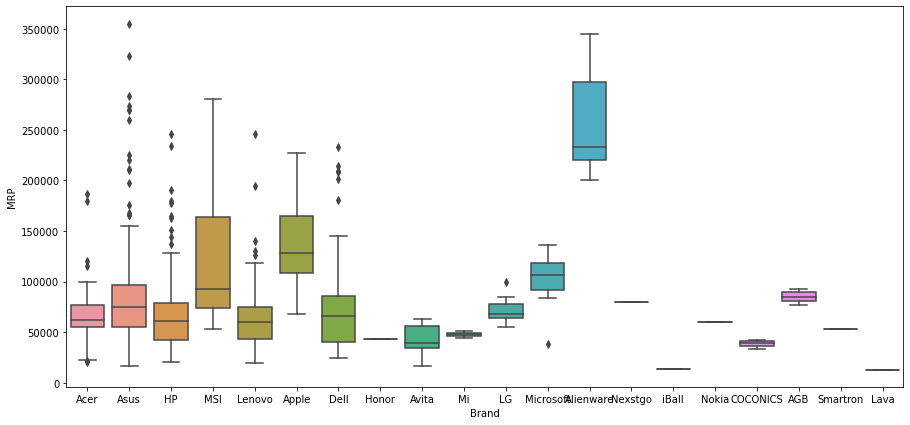

In [71]:
plt.figure(figsize=(15, 7))
sns.boxplot(x = df.Brand, y = df.MRP)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


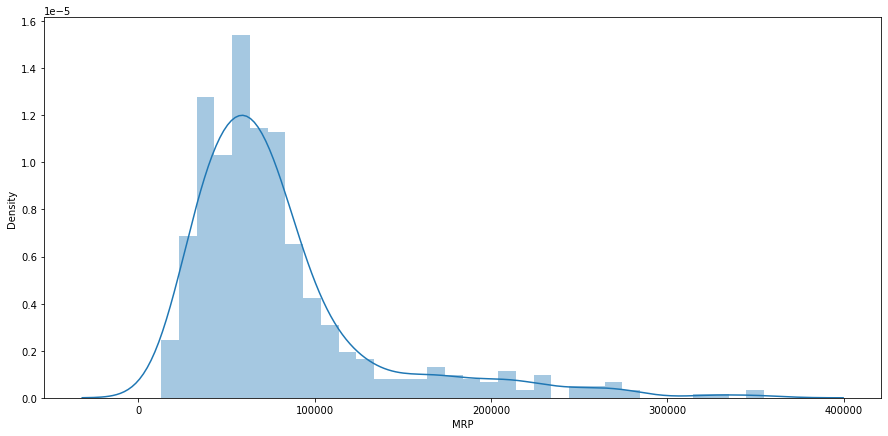

In [72]:
plt.figure(figsize=(15, 7))
sns.distplot(df.MRP)

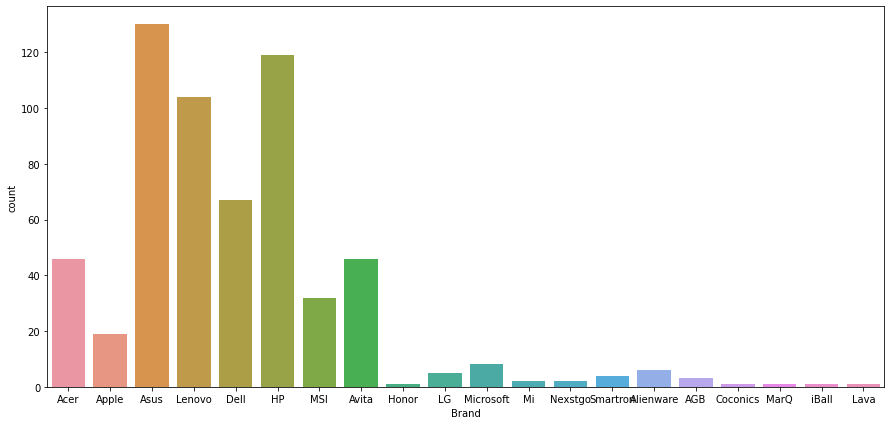

In [62]:
plt.figure(figsize=(15, 7))
sns.countplot(df.Brand)

In [63]:
df.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                         
                min       max           mean
Brand                                       
AGB         83000.0   98999.0   89999.666667
Acer        19990.0  179990.0   68282.086957
Alienware  199990.0  344990.0  247293.333333
Apple       71530.0  239990.0  172085.894737
Asus        18990.0  339990.0   96192.146154
Avita       17990.0   69844.0   42538.000000
Coconics    27965.0   27965.0   27965.000000
Dell        24000.0  257865.0   78552.059701
HP          20900.0  245999.0   69300.436975
Honor       42990.0   42990.0   42990.000000
LG          64490.0   99000.0   80434.000000
Lava        12999.0   12999.0   12999.000000
Lenovo      20990.0  245990.0   64835.701923
MSI         52990.0  259990.0  112396.250000
MarQ        34990.0   34990.0   34990.000000
Mi          43999.0   51999.0   47999.000000
Microsoft   38599.0  135990.0   98441.125000
Nexstgo     79990.0   97990.0   88990.000000
Smartron    42490.0   52990.0   47865.000000
iBall       13990.0   13990.0   13990.000000

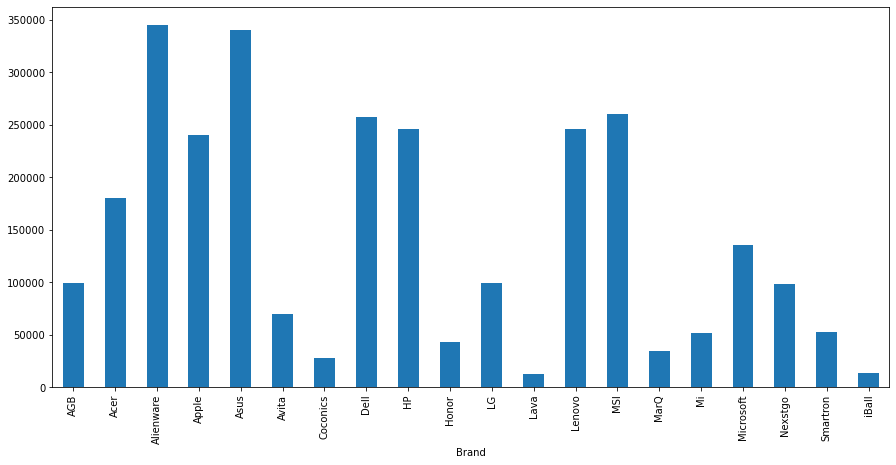

In [66]:
plt.figure(figsize=(15, 7))
df.groupby(['Brand'])['MRP'].max().plot(kind = 'bar')

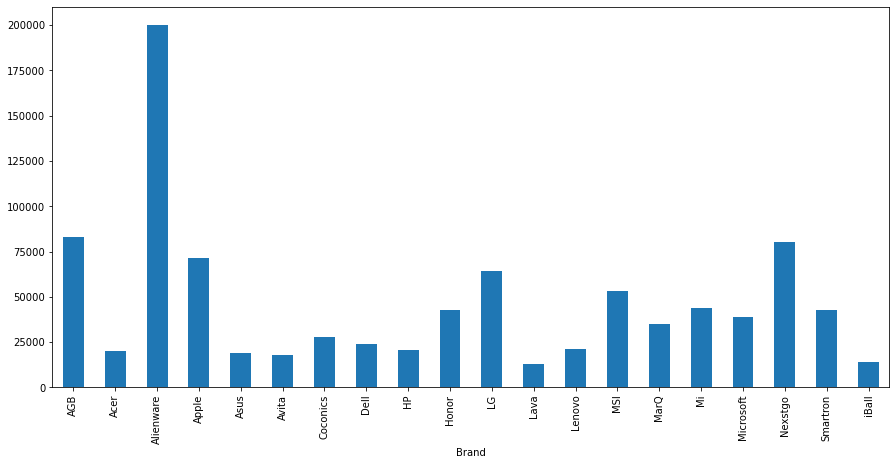

In [67]:
plt.figure(figsize=(15, 7))
df.groupby(['Brand'])['MRP'].min().plot(kind = 'bar')